In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# checking the version of tensorflow
tf.__version__

'2.8.2'

The Medical Training dataset is found in Kaggle https://www.kaggle.com/datasets/mirichoi0218/insurance

we will read the dataset into pandas dataframe

In [5]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [6]:
# checking the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We will use scikit learn to make a column transformer that transforms the features into one hot encoding and normalized numerical values

In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [11]:
# create a column transformer
ct=make_column_transformer((MinMaxScaler(),['age','bmi','children']),(OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region']))

# create x and y
X=insurance.drop('charges',axis=1)
y=insurance['charges']

# create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit column transformer on training data only
ct.fit(X_train)

# transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [18]:
# Visualize the data
X_train_normal[0],X_train_normal.shape

(array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]), (1070, 11))

In [20]:
X_train.head(),X_train.shape

(      age     sex    bmi  children smoker     region
 560    46  female  19.95         2     no  northwest
 1285   47  female  24.32         0     no  northeast
 1142   52  female  24.86         0     no  southeast
 969    39  female  34.32         5     no  southeast
 486    54  female  21.47         3     no  northwest, (1070, 6))

Creating the deep learning model

In [27]:
# building the model
insurance_model=tf.keras.Sequential([tf.keras.layers.Dense(100),tf.keras.layers.Dense(10),tf.keras.layers.Dense(1)])


# compile the model
insurance_model.compile(loss='mae',optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics='mae')

# fit the model
history=insurance_model.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 2ms/step - loss: 13212.9023 - mae: 13212.9023
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 11346.4893 - mae: 11346.4893
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 8237.7695 - mae: 8237.7695
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7579.7964 - mae: 7579.7964
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7109.1592 - mae: 7109.1592
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6473.0366 - mae: 6473.0366
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 5496.7578 - mae: 5496.7578
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 4306.3423 - mae: 4306.3423
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 3709.0466 - mae: 3709.0466
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 3665.1006 - mae: 3665.1006
Epoch 1

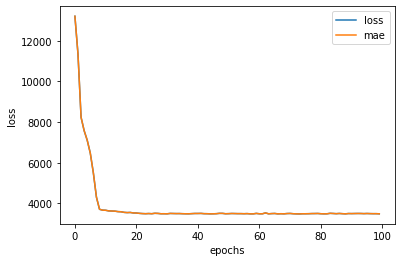

In [28]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");